# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [37]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### Notebook Presentation

In [39]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [40]:
df_data = pd.read_csv('D:\python udemy\data science/all projects/Space Missions/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [41]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [42]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [43]:
df_data.shape

(4324, 9)

In [44]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

### Removing columns containing junk data. 

In [45]:
cleaned_data = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cleaned_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [46]:
print(f"Duplicated values: {cleaned_data.duplicated().values.any()}, {cleaned_data.duplicated().values.sum()}")
print(f"Null values: {cleaned_data.isna().values.any()}, {cleaned_data.isna().values.sum()}")

Duplicated values: True, 1
Null values: True, 3360


In [47]:
cleaned_data[cleaned_data.duplicated(keep=False)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [48]:
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.duplicated().values.any()

False

In [49]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


**Insight**: We drop the unnecessary column (Unnamed: 0.1, Unnamed: 0). There is 1 duplicate value in the data and was removed, however we notice that there's a huge number of missing value (3360) which is coming from the price column since it got only 964 non-null value.

### Changing data types

In [50]:
cleaned_data.Price = cleaned_data.Price.str.replace(',', '')

In [51]:
cleaned_data.Price = pd.to_numeric(cleaned_data.Price)
cleaned_data.Date = pd.to_datetime(cleaned_data.Date, utc=True)

In [52]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4323 non-null   object             
 1   Location        4323 non-null   object             
 2   Date            4323 non-null   datetime64[ns, UTC]
 3   Detail          4323 non-null   object             
 4   Rocket_Status   4323 non-null   object             
 5   Price           963 non-null    float64            
 6   Mission_Status  4323 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 270.2+ KB


### Let's dive into why there's so missing value for the price column

In [53]:
missing_price_data = cleaned_data.groupby(['Organisation', 'Rocket_Status'], as_index=False)['Price'].agg(['size', 'count', lambda x: x.isnull().sum()])
missing_price_data.columns = ['Number of Launches', 'Price Available', 'Price missing']

In [54]:
missing_price_data.sort_values(by='Price missing', ascending=False)[:10]

,,Number of Launches,Price Available,Price missing
Organisation,Rocket_Status,,,
RVSN USSR,StatusRetired,1777,2,1775
General Dynamics,StatusRetired,251,0,251
Arianespace,StatusRetired,165,3,162
VKS RF,StatusRetired,174,18,156
US Air Force,StatusRetired,161,26,135
Boeing,StatusRetired,135,6,129
Martin Marietta,StatusRetired,114,9,105
Lockheed,StatusRetired,79,8,71
NASA,StatusRetired,203,149,54


**Insight**: In this data, we observe that a significant portion of the retired rockets lack price information. For instance, RVSN USSR has an extensive launch history with 1,777 missions, but only 2 of those have recorded prices. Similarly, General Dynamics has a total of 251 launches without any price data, and all of these launches are by retired rockets. Arianespace also shows a similar pattern. This could suggest that many of these launches occurred in the past when record-keeping for rocket costs may not been rigorous. 

## Descriptive Statistics

In [55]:
cleaned_data.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

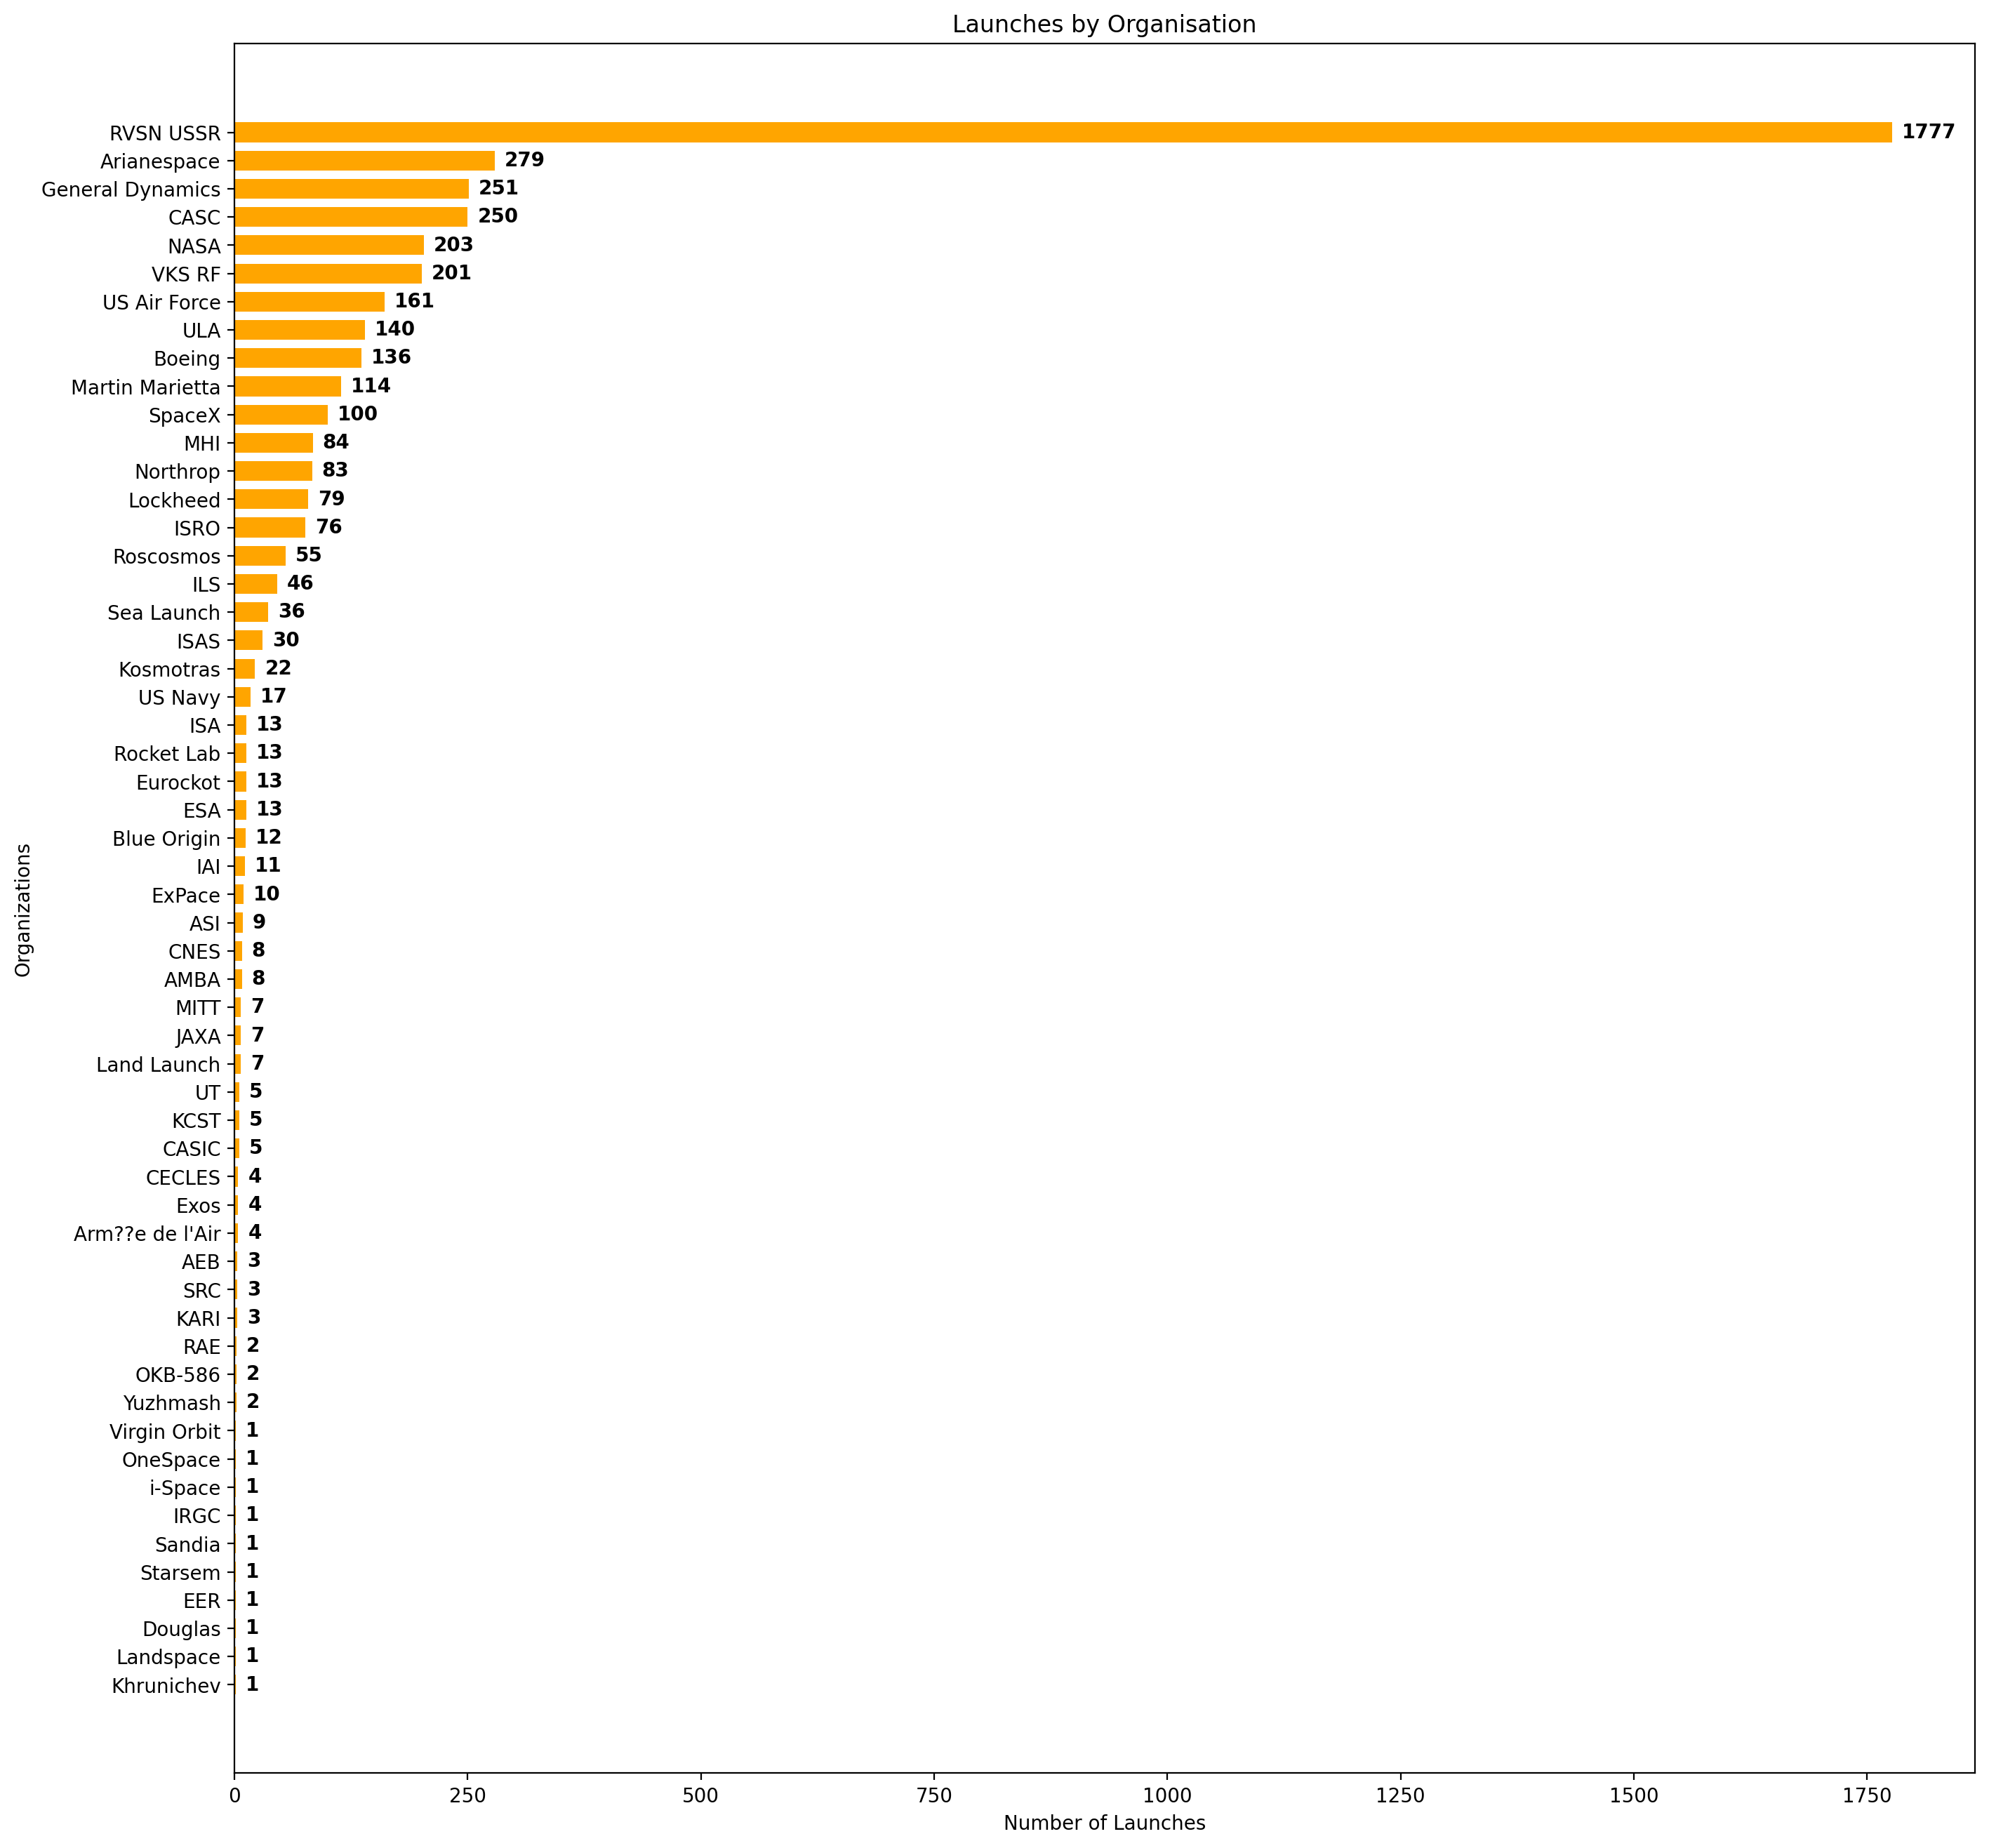

In [56]:
launches_by_org = cleaned_data.Organisation.value_counts()
launches_by_org.sort_values(inplace=True)
fig, ax = plt.subplots(figsize = (16,16), dpi=200)
ax.set_title("Launches by Organisation")
ax.set_xlabel("Number of Launches")
ax.set_ylabel("Organizations")
barh = plt.barh(
    launches_by_org.index, 
    launches_by_org.values,
    height = 0.7,
    color = "Orange"
)
ax.bar_label(barh, launches_by_org.values, padding=5, color='black', fontweight="bold")
plt.show()

**Insight**: RVSN USSR (Soviet Strategic Missile Forces) is the organization with the most launches, with a total of 1777. Follow by Arianespace (French) with 279 launches. General Dynamics (American), CASC (China), and VKS RF (Russian Aerospace Forces) round out the top five, with 250, 250, and 203 launches, respectively.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [57]:
rocket_status = cleaned_data.Rocket_Status.value_counts()
active_rockets_pct = (rocket_status.StatusActive/rocket_status.values.sum())*100
retired_rockets_pct = (rocket_status.StatusRetired/rocket_status.values.sum())*100
print(f"Total Active Rockets is {active_rockets_pct:.4}%.")
print(f"Total Retired Rockets is {retired_rockets_pct:.4}%.")

Total Active Rockets is 18.25%.
Total Retired Rockets is 81.75%.


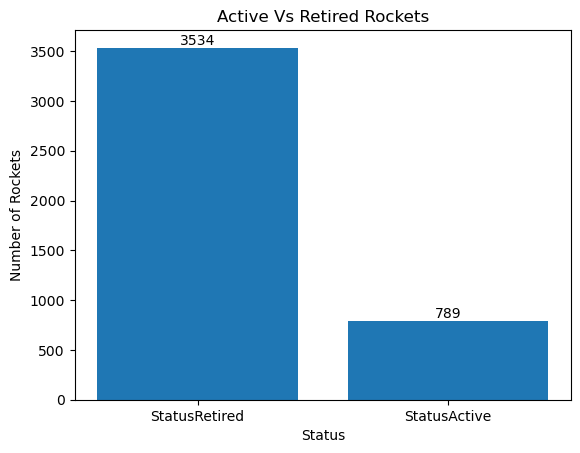

In [58]:
plt.title("Active Vs Retired Rockets")
plt.xlabel("Status")
plt.ylabel("Number of Rockets")
bar = plt.bar(rocket_status.index, rocket_status.values)
plt.bar_label(bar, rocket_status.values)
plt.show()

**Insight** We observed that 81.75% of the rockets are already in retirement while only 18.75% are on active duty.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [59]:
mission_status = cleaned_data.Mission_Status.value_counts()
success_rate = (mission_status.Success/mission_status.values.sum())*100
total_failure = mission_status.Failure + mission_status['Partial Failure'] + mission_status['Prelaunch Failure']
failure_rate = (total_failure/mission_status.values.sum())*100
print(f"Mission success: {mission_status.Success}\nSuccess Rate: {success_rate:.4}%")
print(f"Mission Failure: {total_failure}\nFailure Rate: {failure_rate:.4}%")

Mission success: 3878
Success Rate: 89.71%
Mission Failure: 445
Failure Rate: 10.29%


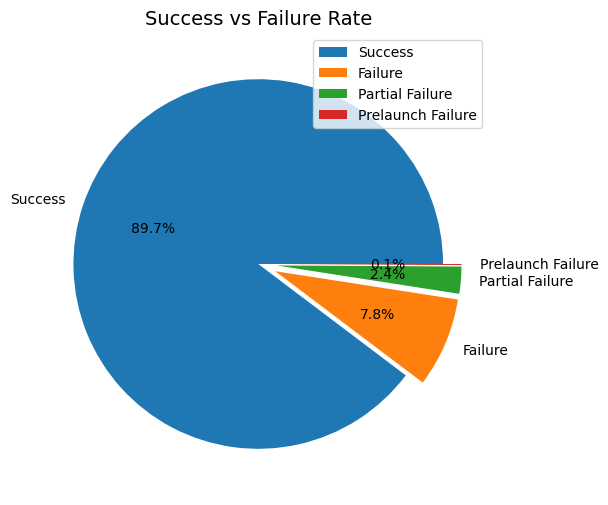

In [60]:
plt.figure(figsize=(8,6), dpi = 100)
plt.title("Success vs Failure Rate", fontsize = 14)
explodes = (0, 0.1, 0.1, 0.1) 
plt.pie(
    mission_status, 
    labels=mission_status.index,
    autopct='%1.1f%%',
    explode = explodes
    )
plt.legend(
    mission_status.index,
    loc = "best"
)
plt.show()

**Insight**: According to this pie chart we can see that there's a high success rate of almost 90% and about 10.29% failure rate in Rocket launches. In simple term, this mean that in every 10 rockets that we launched we only fail on 1 of them which is relatively good.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [61]:
cleaned_data.Price.describe()

count     963.00
mean      153.92
std       288.57
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [62]:
countries_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Iran': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Pacific Ocean': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'North Korea': "Korea, Democratic People's Republic of",
    'South Korea': 'Korea, Republic of'
}
cleaned_data['Country'] = cleaned_data.Location.str.split(',').str[-1].str.strip()
cleaned_data.replace({'Country': countries_mapping.keys()}, {'Country': countries_mapping.values()},inplace=True)
lst_of_ISO = []
for c in cleaned_data.Country:
    lst_of_ISO.append(countries.get(c)[2])
cleaned_data['ISO'] = lst_of_ISO

In [63]:
launches_by_countries = cleaned_data.groupby(['Country','ISO'],as_index=False).agg({'Location': pd.Series.count})
world_map = px.choropleth(
    launches_by_countries,
    locations = 'ISO',
    color = 'Location',
    hover_name = 'Country',
    color_continuous_scale = px.colors.sequential.tempo
)
world_map.update_layout(
    title = "Launches🚀 By Location🌎",
    coloraxis_showscale = True
)
world_map.show()

**Insight**: Based on the visualization provided by the map, the most popular sites for rocket launches are represented by the deepest hues, notably in the United States and the Russian Federation. Kazakhstan, which previously is part of the Soviet Union, comes next with a total of 701 launches. Subsequently, France and China are also prominent in the arena of space launches, 303 and 268 launches respectively.

# Use a Choropleth Map to Show the Number of Failures by Country


To simplify the graph, we will categorize both Prelaunch Failures and Partial Failures under Failures, as they essentially represent unsuccessful attempts.

In [64]:
swap_values = {
    'Prelaunch Failure': 'Failure',
    'Partial Failure': 'Failure'
}
new_df = cleaned_data.replace({'Mission_Status':swap_values.keys()}, {'Mission_Status':swap_values.values()})
failure_df = new_df.query("Mission_Status == 'Failure'").groupby(['Country','ISO'], as_index=False).agg({'Location': pd.Series.count})
world_map = px.choropleth(
    failure_df,
    locations = 'ISO',
    color = 'Location',
    hover_name = 'Country',
    color_continuous_scale = px.colors.sequential.matter
)
world_map.update_layout(
    title = "Failures⛔ By Location🌎",
    coloraxis_showscale = True
)
world_map.show()

**Insight**: It has been noted that the USA has the highest number of failed launches, followed by the Russian Federation, which correlates with their high total launch counts. Interestingly, Kazakhstan has recorded a similar number of failed launches as the Russian Federation, with both at 93. However, given that more frequent launch sites naturally might see more failures, this data does not provide clarity on which locations have the highest or lowest ratio of failures to total launches.

In [65]:
temp_df = new_df.groupby(["Country",'ISO'], as_index=False).agg({'Location': pd.Series.count})
fail_df = new_df.groupby(['Country','ISO','Mission_Status'], as_index=False).agg({'Location': pd.Series.count})
fail_df = fail_df[fail_df['Mission_Status'] == 'Failure']
fail_rate_df = temp_df.merge(fail_df, how='inner', on=['Country','ISO'])
fail_rate_df.columns = ['Country', 'ISO', 'Total_Launch', 'Mission_Status', 'Total_Failures']
fail_rate_df["Failure rate"] = fail_rate_df.Total_Failures/fail_rate_df.Total_Launch*100
fail_rate_df.sort_values(by='Failure rate', ascending=False)

,Country,ISO,Total_Launch,Mission_Status,Total_Failures,Failure rate
1,Brazil,BRA,3,Failure,3,100.00
10,"Korea, Republic of",KOR,3,Failure,2,66.67
5,"Iran, Islamic Republic of",IRN,14,Failure,9,64.29
9,"Korea, Democratic People's Republic of",PRK,5,Failure,3,60.00
0,Australia,AUS,6,Failure,3,50.00
6,Israel,ISR,11,Failure,2,18.18
4,India,IND,76,Failure,13,17.11
11,New Zealand,NZL,13,Failure,2,15.38
8,Kazakhstan,KAZ,701,Failure,93,13.27
13,USA,USA,1387,Failure,166,11.97


**Insight**: Now, we have a clearer perspective on the failure rates of rocket launches by country. Although the USA has experienced 166 failures in total, its failure rate is relatively low at around 12%. Similarly, the Russian Federation has had 93 failures, which amounts to a failure rate of just 6.65%. On the other hand, countries with fewer overall launches tend to have higher failure rates. For example, Brazil has seen only 3 failures, but that amount to a failure rate of 100%, and Iran has had 9 failures, which is equal to a failure rate of 64.29%.

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [66]:
burst = px.sunburst(
    cleaned_data,
    path = ['Country', 'Organisation', 'Mission_Status'],
    values = 'Price',
    title = "Where was the most expensive rocket launched?"
)
burst.update_layout(
    xaxis_title = "Number of Launches",
    yaxis_title = "City",
    coloraxis_showscale = False
)
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [67]:
money_spent_by_org = cleaned_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum})
money_spent_by_org.sort_values(by="Price", ascending=False, inplace=True)

In [68]:
money_spent_by_org = money_spent_by_org[money_spent_by_org['Price'] > 0]
money_spent_by_org

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,310.51"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


In [69]:
bar = px.bar(
    money_spent_by_org,
    'Organisation',
    'Price',
    title = "Rocket Price by Organisation"
)

bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

In [70]:
cleaned_data['Month'] = cleaned_data.Date.dt.month
cleaned_data['Year'] = cleaned_data.Date.dt.year

In [71]:
launch_per_year = cleaned_data.groupby('Year', as_index=False).agg({'Location': pd.Series.count})
chart = px.line(
    launch_per_year,
    'Year',
    'Location',
    markers = True,
    title = 'Launches Per Year',
)
chart.update_layout(
     yaxis_title = 'Number of Launches', 
     xaxis = dict(
        tickmode = 'linear',
        dtick = 5
    )
)
chart.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [72]:

launch_per_year = cleaned_data.groupby('Month', as_index=False).agg({'Location': pd.Series.count})
chart = px.line(
    launch_per_year,
    'Month',
    'Location',
    markers = True,
    title = 'Launches Per Month',
)
chart.update_layout(
     yaxis_title = 'Number of Launches',
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)
chart.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [76]:
price_overtime = cleaned_data.groupby('Year',as_index=False).agg({"Price": pd.Series.mean})
line = px.line(
    price_overtime,
    'Year',
    'Price'
)
line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 